# Exercise: AutoGluon

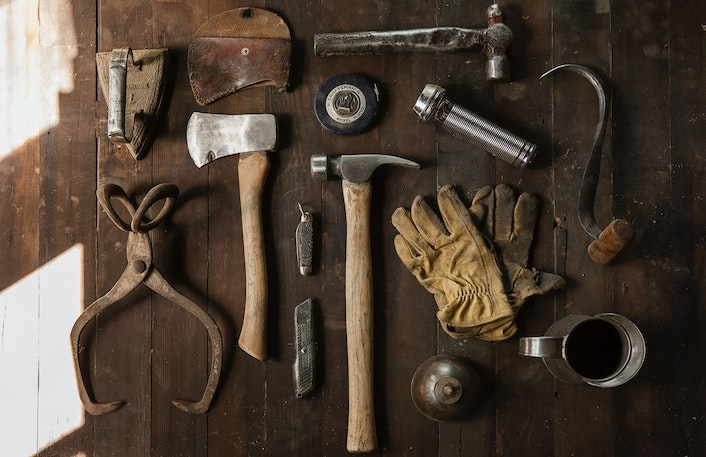

Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [8]:
! python --version

Python 3.10.14


In [10]:
!pip install -U pip
!pip install pandas
!pip install -U setuptools wheel
!pip install numpy
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
e:\Projects_for_courses\Machine_Learning_Fundemetals\Intro_to_ml\cd0385-exercise-files\.conda\python.exe -m pip install -U pip


  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl.metadata (402 bytes)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.18.4-py2.py3-none-any.whl.metadata (50 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached idna-2.6-py2.py3-none-any.whl.metadata (8.9 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl.metadata (32 kB)
Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [328 lines of output]
      Running from numpy source directory.
      C:\Users\LEGION\AppData\Local\Temp\pip-install-4r4hu8cf\numpy_944703b7677c44e78d602d9e0593df01\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['e:\\Projects_for_courses\\Machine_Learning_Fundemetals\\Intro_to_ml\\cd0385-exercise-files\\.conda\\lib', 'C:\\', 'e:\\Projects_for_courses\\Machine_Learning_Fundemetals\\Intro_to_ml\\cd0385-exercise-files\\.conda\\libs', 'C:\\Users\\LEGION\\anaconda3\\Library\\lib']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccom

     ---------------------------------------- 0.0/138.0 kB ? eta -:--:--
     ----------- --------------------------- 41.0/138.0 kB 1.9 MB/s eta 0:00:01
     ------------------------------- ------ 112.6/138.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 138.0/138.0 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/43.6 kB ? eta -:--:--
     ---------------------------------------- 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/134.8 kB ? eta -:--:--
     ----------------- --------------------- 61.4/134.8 kB 3.4 MB/s eta 0:00:01
     ---------------------------------- --- 122.9/134.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 134.8/134.8 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/234.8 kB ? eta -:--:--
   ------ --------------------------------- 41.0/

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

e:\Projects_for_courses\Machine_Learning_Fundemetals\Intro_to_ml\cd0385-exercise-files\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## AutoGluon Classifier

In [12]:
# Load in the wine dataset
wine = datasets.load_wine()

In [13]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

# Include the target as well
df["target"] = wine["target"]

In [14]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [15]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(
    train_data=df_train, time_limit=120, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels\ag-20240711_065304"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       4.11 GB / 15.87 GB (25.9%)
Disk Space Avail:   202.31 GB / 465.76 GB (43.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdo

In [16]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          LightGBM_BAG_L1   0.985915    accuracy       0.007000   2.612446                0.007000           2.612446            1       True          5
1        LightGBMXT_BAG_L1   0.985915    accuracy       0.007998   2.528309                0.007998           2.528309            1       True          4
2  RandomForestGini_BAG_L1   0.985915    accuracy       0.078437   1.650577                0.078437           1.650577            1       True          6
3  RandomForestEntr_BAG_L1   0.985915    accuracy       0.084522   0.672445                0.084522           0.672445            1       True          7
4      WeightedEnsemble_L3   0.985915    accuracy       0.085515   0.760140                0.000993           0.087695            3       True         10
5      Weighte

e:\Projects_for_courses\Machine_Learning_Fundemetals\Intro_to_ml\cd0385-exercise-files\.conda\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'LightGBMXT_BAG_L1': 0.9859154929577465,
  'LightGBM_BAG_L1': 0.9859154929577465,
  'RandomForestGini_BAG_L1': 0.9859154929577465,
  'RandomForestEntr_BAG_L1': 0.9859154929577465,
  'WeightedEnsemble_L2': 0.9859154929577465,
  'NeuralNetFastAI_BAG_L2': 0.985915

<Axes: xlabel='model'>

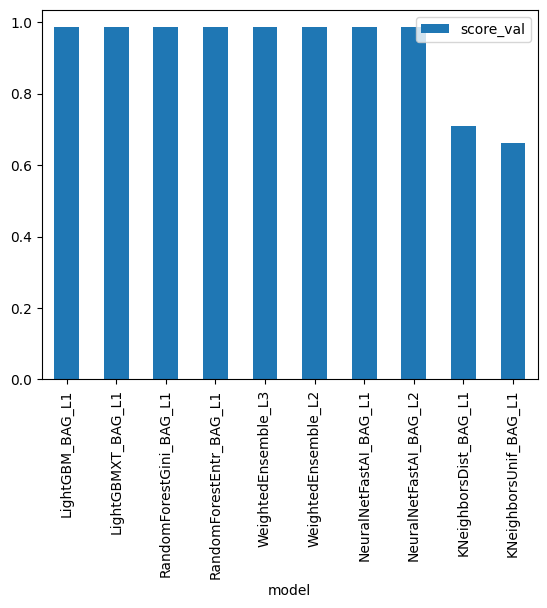

In [17]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [18]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

## AutoGluon Regression

In [19]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [20]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd["target"] = diabetes["target"]

In [21]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [22]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# Since we are using a different eval_metric, we'll need to assign the problem_type
predictor = TabularPredictor(
    label="target", problem_type="regression", eval_metric="r2"
).fit(
    train_data=dfd_train,
    time_limit=120,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels\ag-20240711_065513"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       4.06 GB / 15.87 GB (25.6%)
Disk Space Avail:   202.30 GB / 465.76 GB (43.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdo

Leaderboard on holdout data (DyStack):
                    model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   KNeighborsDist_BAG_L1       0.539150   0.428517          r2        0.018001       0.018666  0.005516                 0.018001                0.018666           0.005516            1       True          2
1   KNeighborsUnif_BAG_L1       0.537705   0.417452          r2        0.018986       0.022080  0.004931                 0.018986                0.022080           0.004931            1       True          1
2  RandomForestMSE_BAG_L1       0.493518   0.454406          r2        0.095077       0.079514  0.798879                 0.095077                0.079514           0.798879            1       True          5
3     WeightedEnsemble_L2       0.483116   0.532009          r2        0.238918       0.031677  2.030558                 0.002990

In [23]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.533684          r2       0.258133  16.394550                0.000993           0.111081            2       True         11
1        LightGBMXT_BAG_L1   0.531077          r2       0.014129   1.768280                0.014129           1.768280            1       True          3
2          CatBoost_BAG_L1   0.511893          r2       0.158863   7.338005                0.158863           7.338005            1       True          6
3     ExtraTreesMSE_BAG_L1   0.497069          r2       0.084532   0.636186                0.084532           0.636186            1       True          7
4          LightGBM_BAG_L1   0.496131          r2       0.008999   3.241471                0.008999           3.241471            1       True          4
5   NeuralNetF

e:\Projects_for_courses\Machine_Learning_Fundemetals\Intro_to_ml\cd0385-exercise-files\.conda\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.4397005764934093,
  'LightGBMXT_BAG_L1': 0.5310771377310223,
  'LightGBM_BAG_L1': 0.49613066803956196,
  'RandomForestMSE_BAG_L1': 0.470163735946484,
  'CatBoost_BAG_L1': 0.5118926845535071,
  'ExtraTreesMSE_BAG_L1': 0.4970688170183579,
  'NeuralNetFastAI_BAG_L1': 0.49520293636011126,
  'X

<Axes: xlabel='model'>

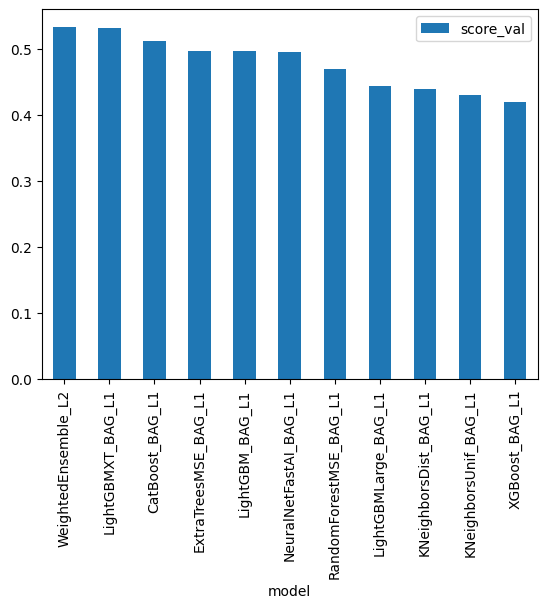

In [24]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [25]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)